Name: Jiya Hona
Symbol No: 29097/078
Lab: Naive Bayes Classifier
Dataset Size: 9


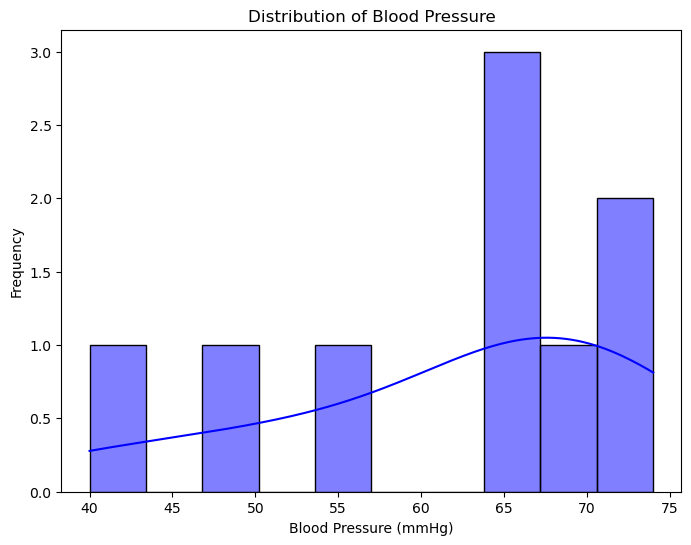

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Feature Importance (Standard Deviation):
Pregnancies: 3.46
Glucose: 42.50
BloodPressure: 11.24
SkinThickness: 17.57
Insulin: 177.15
BMI: 6.00
DiabetesPedigreeFunction: 0.69
Age: 10.64

Confusion Matrix:
[[0 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.00      0.00      0.00         1
    Diabetes       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Enter new patient data to predict Diabetes:


Enter Pregnancies:  2
Enter Glucose:  130
Enter BloodPressure:  80
Enter SkinThickness:  30
Enter Insulin:  120
Enter BMI:  33.6
Enter DiabetesPedigreeFunction:  0.627
Enter Age:  45



Prediction:  Diabetes


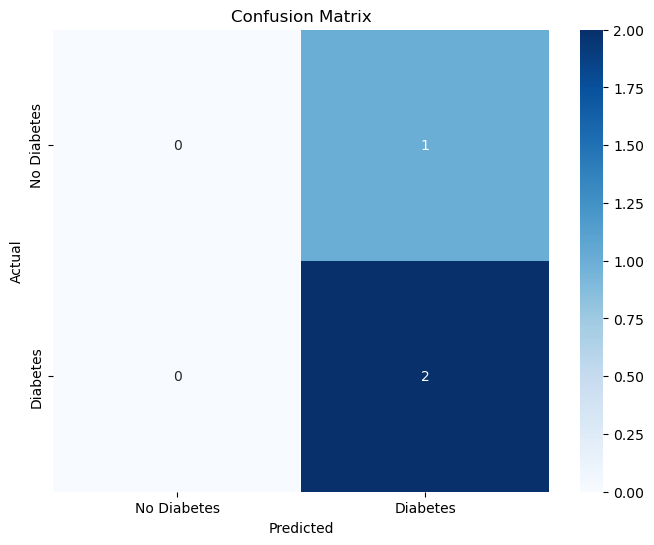

In [1]:
# Student Info
print("Name: Jiya Hona")
print("Symbol No: 29097/078")
print("Lab: Naive Bayes Classifier")

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = pd.read_csv("Diabetes.csv")

# Handle invalid BloodPressure values (replace 0 with mean)
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].mean())
dataset = dataset.replace('', np.nan)  # Replace empty strings with NaN
dataset = dataset.dropna()  # Drop rows with missing values
dataset = dataset[dataset.select_dtypes(include=[np.number]).columns]  # Ensure numeric columns

print("Dataset Size:", len(dataset))

# Visualize BloodPressure distribution
plt.figure(figsize=(8, 6))
sns.histplot(dataset['BloodPressure'], bins=10, kde=True, color='blue')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

# Feature importance (using standard deviation to show variability)
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
print("\nFeature Importance (Standard Deviation):")
for feat in features:
    std = dataset[feat].std()
    print(f"{feat}: {std:.2f}")

# Split dataset into 70% train and 30% test
split = int(len(dataset) * 0.7)
train, test = dataset.iloc[:split], dataset.iloc[split:]

# Prepare training data
train_features = train[features].values
train_labels = train["Diabetes"].values

# Prepare testing data
test_features = test[features].values
test_labels = test["Diabetes"].values

# Train model
model = GaussianNB()
model.fit(train_features, train_labels)

# Predict on test set
predicted = model.predict(test_features)

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(test_labels, predicted))
print("\nClassification Report:")
print(metrics.classification_report(test_labels, predicted, target_names=["No Diabetes", "Diabetes"]))

# Live user input for prediction
print("\nEnter new patient data to predict Diabetes:")
user_input = []
for feat in features:
    while True:
        try:
            val = float(input(f"Enter {feat}: "))
            if val < 0 or (feat == "BloodPressure" and val == 0):  # Check for negative or zero BloodPressure
                print(f"{feat} cannot be negative or zero. Please enter a valid number.")
                continue
            user_input.append(val)
            break
        except ValueError:
            print("Invalid input. Please enter a number.")

user_prediction = model.predict([user_input])
print("\nPrediction:", " Diabetes" if user_prediction[0] == 1 else "No Diabetes")

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
cm = metrics.confusion_matrix(test_labels, predicted)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
